MODEL BUILT: KNN



In [ ]:
# importing the libraries-

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset-

df = pd.read_csv('/content/drive/MyDrive/heart.csv')
print(df)


     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

In [ ]:
# checking the dataset for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# no missing values are present in the dataset.

Exploratory Data Analysis(EDA)-


In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Therefore, we have determined that 165 people have a heart disease and 138 people do not have a heart disease

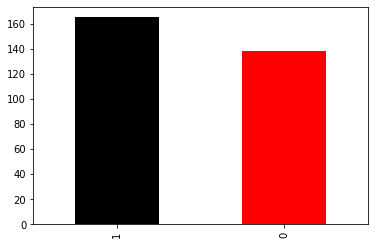

In [ ]:
df.target.value_counts().plot(kind="bar", color=["black", "red"])

Plotting a bar plot for count of MALE and FEMALE having heart disease-

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
# 96 female patients and 207 male patients

In [ ]:
import plotly.express as px
px.bar(df,df['sex'],df['target'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



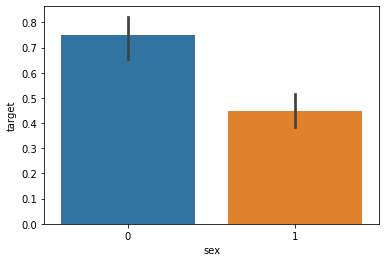

In [ ]:
sns.barplot(df['sex'],df['target'])
plt.show()

Scatter Plot between the AGE and MAXIMUM HEART RATE-

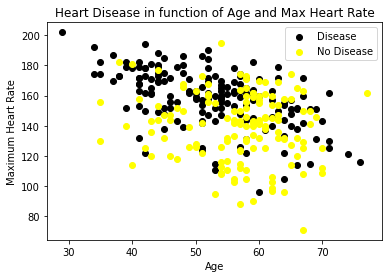

In [ ]:
# thalach column displays the maximum heart rate achieved

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="black")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="yellow")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Disease", "No Disease"])

In [ ]:
# KNN ALGORITHM

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
# import and train the KNN model-

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10,metric = 'minkowski',p=2)
classifier.fit(x_tr,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# predicting the output and calculating accuracy and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(x_te)
acc = accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)
print(acc)


0.8852459016393442


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feb7b7eda20>)

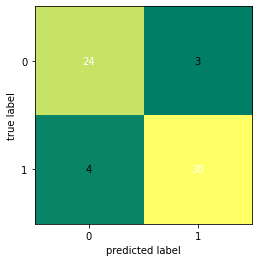

In [ ]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm,cmap='summer')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



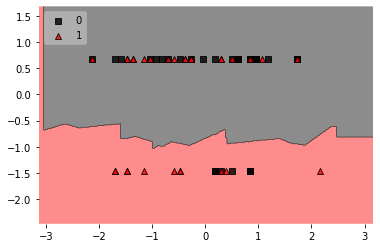

In [ ]:
value=1.5
width=10
plot_decision_regions(X=x_te,y=y_te,clf=classifier,feature_index=[0,1],
                     filler_feature_values={2:value, 3:value, 4:value, 5:value, 6:value, 7:value, 8:value, 9:value, 10:value, 11:value, 12:value},
                     filler_feature_ranges={2:width, 3:width, 4:width, 5:width, 6:width, 7:width, 8:width, 9:width, 10:width, 11:width, 12:width},
                     legend=2,colors='black,red')
plt.show()

In [ ]:
testSet = [[44,1,1,120,263,0,1,173,0,0,2,0,3]]
test = pd.DataFrame(testSet)
y_pred = classifier.predict(test)
if y_pred==1:
  print('You have a heart disease')
else:
  print('You do not have a heart disease')
print(y_pred)

You have a heart disease
[1]
